# Importing libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Data preprocessing

In [2]:
X = np.arange(-100, 100, 4, dtype=np.float64)
y = X + 10

In [3]:
X.shape

(50,)

In [4]:
X = tf.constant(X)
y = tf.constant(y)

In [5]:
X_train, y_train = X[:40], y[:40]
X_test, y_test = X[40:], y[40:]

In [6]:
print(f'Training Data : {len(X_train)*100/len(X)}%')
print(f'Testing Data : {len(X_test)*100/len(X)}%')

Training Data : 80.0%
Testing Data : 20.0%


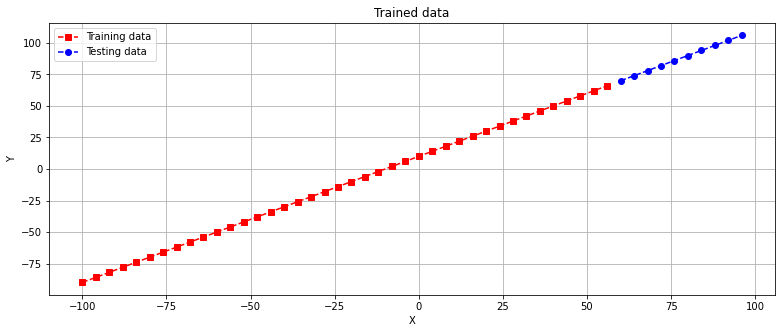

In [7]:
plt.figure(figsize=(13, 5))
plt.plot(X_train, y_train, 'rs--', label='Training data')
plt.plot(X_test, y_test, 'bo--', label='Testing data')
plt.title('Trained data')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.legend()

plt.show()

# Creating the model

In [8]:
# Set random seed
tf.random.set_seed(42)

In [9]:
# Creating the model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(1,), name='Input_layer'),
    tf.keras.layers.Dense(10, name='Hidden_layer'),
    tf.keras.layers.Dense(1, name='Output_layer')
], name='ANN')

In [10]:
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

In [11]:
model.summary()

Model: "ANN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden_layer (Dense)         (None, 10)                20        
_________________________________________________________________
Output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Trainable params: Parameters that going to update during training
* Non-trainable params: These parameters will not going to update during the training (use in **transfer learning**)

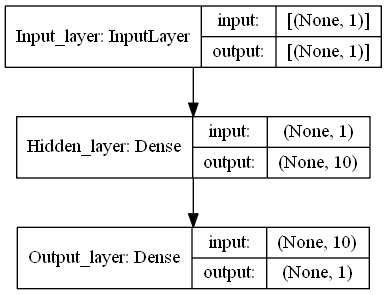

In [12]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [13]:
model.fit(X_train, y_train, epochs=100, verbose=0)

# Evaluation the model

In [14]:
y_pred = model.predict(X_test)

In [26]:
def plot_Predictions(X_test, y_test, y_pred):
    '''
    Plot test data vs predicted data
    '''

    plt.figure(figsize=(13, 5))
    plt.plot(X_test, y_pred, 'rs--', label='Y-Predictions')
    plt.plot(X_test, y_test, 'bo--', label='Y-Actual')
    plt.title('Trained data')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.xticks(X_test)
    plt.grid()
    plt.legend()

    plt.show()

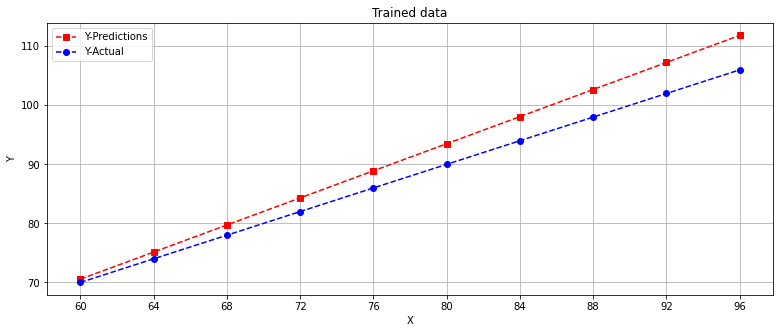

In [27]:
plot_Predictions(X_test, y_test, y_pred)

In [44]:
def MAE(y_true, y_pred):
    '''
    Doc string :
    Computes the mean absolute error between labels and predictions.
    '''

    err = np.zeros(len(y_true))

    for i in range(len(y_true)):
        err[i] = np.abs(y_true[i] - y_pred[i])

    return np.mean(err)

In [47]:
def MSE(y_true, y_pred):
    '''
    Doc string :
    Computes the mean squared error between labels and predictions.
    '''

    err = np.zeros(len(y_true))

    for i in range(len(y_true)):
        err[i] = np.square(y_true[i] - y_pred[i])

    return np.mean(err)

In [50]:
MAE(y_test, y_pred), MSE(y_test, y_pred)

(3.1969398498535155, 13.070125674881274)

In [88]:
tf.metrics.mean_absolute_error(y_test, np.squeeze(y_pred)), tf.metrics.mean_squared_error(y_test, np.squeeze(y_pred))

(<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070127>)

In [76]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 30ms/step - loss: 3.1969 - mae: 3.1969


[3.1969382762908936, 3.1969382762908936]